<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/gapfillingGSMMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gapfilling Genome-Scale Metabolic Models with DNNGIOR**

In [1]:
# @title Install packages and setup license [note: I am not sure if this needs to be done every time]
!pip install cobra
!pip install dnngior --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 38.2 MB/s eta 0:00:00


In [2]:
# @title
import os
def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("/content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at /content/licenses/gurobi.lic")



# Create directory for the license
os.makedirs("/content/licenses", exist_ok=True)

# Generate the license file
create_gurobi_license()

#add to path
os.environ['GRB_LICENSE_FILE'] = '/content/licenses/gurobi.lic'

!pip install gurobipy

License file created at /content/licenses/gurobi.lic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 93.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dnngior 0.0.5 requires cobra<=0.23.0, but you have cobra 0.29.1 which is incompatible.
dnngior 0.0.5 requires gurobipy<11.0.0,>=10.0.1, but you have gurobipy 12.0.1 which is incompatible.


In [3]:
# @title setup google drive [This was easier for me]
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
cd /content/drive/MyDrive/Antony/

/content/drive/MyDrive/Antony


General dependencies needed

In [5]:
from cobra.io import read_sbml_model
import pandas as pd

For this tutorial we require both the Gapfilling class and the NN_Predictor class from the dnngior package:

In [7]:
from dnngior.gapfill_class import Gapfill
from dnngior.NN_Predictor import NN

# Gap-filling the draft Genome Scale Metabolic Model

In this tutorial we will learn how you can gap-fill models using the dnngior package.

Let's start with getting the Bifidobacterium model we have been working with last time.

In [8]:
path_to_draft_model = "Bifidobacterium adolescentis_atcc_15703.sbml"
draft_model = read_sbml_model(path_to_draft_model)
draft_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


As we establlished before, this model is incomplete and no biomass is produced. If we want to use our model we will need to add new reactions to the draft model from the ModelSEED database.

We can do this Using the `Gapfill` class from DNNGIOR, if we just want to use the default settings all we need to do is give the path to the draft model and it will start gap-filling the model.

This will take a couple minutes.

In [9]:
gapfill_complete_medium = Gapfill(draftModel = path_to_draft_model)

Gap-filling database =  ModelSEED


ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


#reactions not found in NN-keys:  65 / 726
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Flux through biomass reaction is 1.00000000
Flux through biomass reaction is 1.00000000
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  79156 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  39578 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  19789 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  9894 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  4947 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  2473 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:

The Gapfill object keeps track of added reactions

In [ ]:
gf_model = gapfill_complete_medium.gapfilledModel
gf_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00028_e0,EX_cpd00028_e0,0.4434,34,0.07%
cpd00030_e0,EX_cpd00030_e0,0.4434,0,0.00%
cpd00034_e0,EX_cpd00034_e0,0.4434,0,0.00%
cpd00051_e0,EX_cpd00051_e0,11.91,6,0.34%
cpd00053_e0,EX_cpd00053_e0,358.2,5,8.58%
cpd00058_e0,EX_cpd00058_e0,0.4434,0,0.00%
cpd00060_e0,EX_cpd00060_e0,7.219,5,0.17%
cpd00063_e0,EX_cpd00063_e0,0.4434,0,0.00%
cpd00065_e0,EX_cpd00065_e0,3.355,11,0.18%
cpd00066_e0,EX_cpd00066_e0,10.85,9,0.47%


In [ ]:
print("Number of reactions added:", len(gapfill_complete_medium.added_reactions))

Number of reactions added: 81


In [ ]:
# I stole this code from tutorial in the git
check = False
for i in draft_model.medium:
    if i not in gf_model.medium:
        print("Compound ", i , " was part of the initial's model model but not in the gapfilled.")
        check = True
if not check:
    print("All exchange reactions of the initial reconstruction are present on the gapfilled model.\n")

for j in gf_model.medium:
    if j not in draft_model.medium:
        print("Compound ", gf_model.metabolites.get_by_id(j[3:]).name, " has been added in the gapfilled model's medium.")

All exchange reactions of the initial reconstruction are present on the gapfilled model.

Compound  Calomide_e0  has been added in the gapfilled model's medium.
Compound  phosphatidylethanolamine dioctadecanoyl_e0  has been added in the gapfilled model's medium.
Compound  Ubiquinone-8_e0  has been added in the gapfilled model's medium.
Compound  Ca2+_e0  has been added in the gapfilled model's medium.
Compound  Menaquinone 7_e0  has been added in the gapfilled model's medium.
Compound  Phosphatidylglycerol dioctadecanoyl_e0  has been added in the gapfilled model's medium.
Compound  1,2-Diacyl-sn-glycerol dioctadecanoyl_e0  has been added in the gapfilled model's medium.
Compound  Bactoprenyl diphosphate_e0  has been added in the gapfilled model's medium.
Compound  Zymosterol_e0  has been added in the gapfilled model's medium.
Compound  two linked disacharide pentapeptide murein units (uncrosslinked, middle of chain)_e0  has been added in the gapfilled model's medium.
Compound  Cobinami

## Gapfilling with a different medium

By default DNNGIOR assumes you want to gap-fill based on a complete medium (i.e. a medium with every required metabolite readily available). However, quite often you want a model for a specific medium instead. To do this, you need to provide the gapfiller with file describing your medium. In this examples we wil use a [restrictive?] nitrogen based medium

In [12]:
medium_file_path = 'DNNGIOR/docs/biochemistry/Nitrogen-Nitrite_media.tsv'
medium_df = pd.read_csv(medium_file_path, sep='\t')
print(medium_df)

          id          name  concentration  minflux  maxflux
0   cpd00027     D-Glucose          0.001     -100        5
1   cpd00075       Nitrite          0.001     -100        5
2   cpd00009     Phosphate          0.001     -100        5
3   cpd00048       Sulfate          0.001     -100        5
4   cpd00063          Ca2+          0.001     -100      100
5   cpd00011           CO2          0.001     -100        0
6   cpd10516           fe3          0.001     -100      100
7   cpd00067            H+          0.001     -100      100
8   cpd00001           H2O          0.001     -100      100
9   cpd00205            K+          0.001     -100      100
10  cpd00254            Mg          0.001     -100      100
11  cpd00971           Na+          0.001     -100      100
12  cpd00007            O2          0.001     -100      100
13  cpd00099           Cl-          0.001     -100      100
14  cpd00058          Cu2+          0.001     -100      100
15  cpd00149          Co2+          0.00

We can provide the path to the file describing the medium using the medium_file parameter

In [13]:
gapfill_nit_medium = Gapfill(draftModel = path_to_draft_model, medium_file = medium_file_path)

Gap-filling database =  ModelSEED


ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


Loading medium from: DNNGIOR/docs/biochemistry/Nitrogen-Nitrite_media.tsv
#reactions not found in NN-keys:  4 / 665
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Flux through biomass reaction is 1.00000000
Flux through biomass reaction is 1.00000000
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  76914 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  38457 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  19228 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  9614 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  4807 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  2403 


Warning for adding constraints:

In [10]:
gf_model_nit_medium = gapfill_nit_medium.gapfilledModel.summary()

NameError: name 'gapfill_nit_medium' is not defined

Relevant to note here is that using a more minimal medium tends to lead to a more gapfilled reactions as the models have to synthesize more compounds themselves

In [ ]:
print("Number of reactions added:", len(gapfill_nit_medium.added_reactions))

Number of reactions added: 200


In [ ]:
check = False
for i in draft_model.medium:
    if i not in gf_model_nit_medium.medium:
        print("Compound ", i , " was part of the initial's model model but not in the gapfilled.")
        check = True
if not check:
    print("All exchange reactions of the initial reconstruction are present on the gapfilled model.\n")

for j in gf_model_nit_medium.medium:
    if j not in draft_model.medium:
        print("Compound ", gf_model_nit_medium.metabolites.get_by_id(j[3:]).name, " has been added in the gapfilled model's medium.")

# Batch gapfilling using the command line interface (CLI)

If we have a larger number of models we want to gapfill with the same medium you could use a for loop like with the draft model reconstruction but it is also possible to use the CLI.

`python fasta2model_CLI.py -m DIR_MODELS -o DIR_OUTPUT -e PATH_TO_MEDIUM_FILE`

This command will create an output folder (-o) containing a subfolder with gapfilled models, a log, and a tsv file telling you the number of added reactions.

This CLI has limited functionality and assumes the same conditions for all gapfilling but you can change the standard gapfilling medium using the -e parameter.

Side note, you can also the following command to do the draft reconstruciton and gap-filling together although this is currently still a bit buggy.

`python fasta2model_CLI.py -f DIR_FASTA -o DIR_OUTPUT' -e PATH_TO_MEDIUM_FILE`

# For the interested: How does DNNGIOR work

DNNGIOR gap-filling takes two steps:
1. Making a prediction based on the reactions in the draft model and asign every reaction in the database a cost.
2. Using these costs to find the set of added reactions that with the lowest total cost resulting in flux through the objective function.

For step one the DNNGIOR neural network makes a prediction based on the set of reactions in the draft model. Lets have a look at these predictions, we can load in the default neural network by providing the `NN` class the path stored in `TRAINED_NN_MSEED`:

In [ ]:
from dnngior.variables import TRAINED_NN_MSEED
NN_MSEED = NN(path=TRAINED_NN_MSEED)

and make a prediction for our model and look at the distribution of predictions

#reactions not found in NN-keys:  65 / 726


<Axes: ylabel='Frequency'>

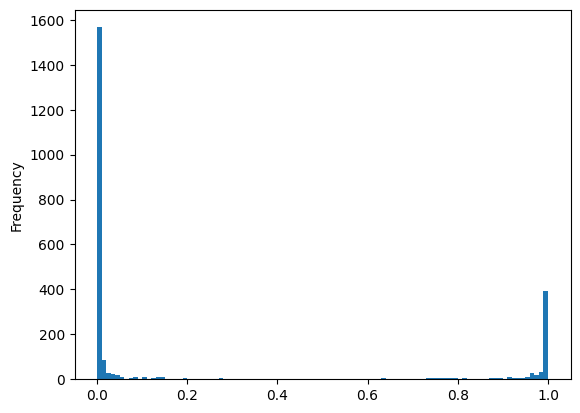

In [ ]:
prediction = NN_MSEED.predict(draft_model)
p = pd.Series(prediction)
p.plot.hist(bins=100)

Because we want reactions that are likely to have a low cost we can flip them around

<Axes: ylabel='Frequency'>

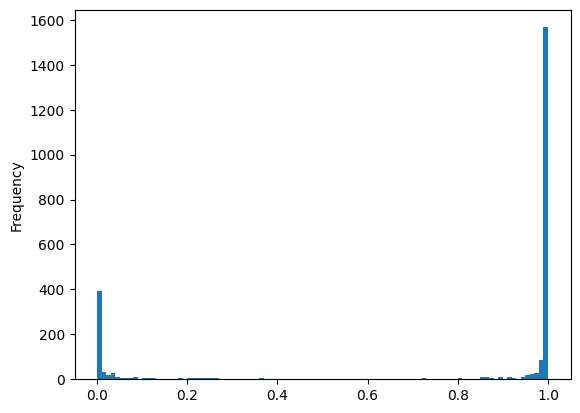

In [ ]:
(1-p).plot.hist(bins=100)

The 24xx reactions that get a prediction are part of the microbial reactome (all the reactions that were present in the training dataset), as the network cannot make predictions for reactions it has never seen it will not give a prediction for the other reactions.

Instead these other reactions will get the default cost which is normally set to 1.0 but can be changed if you want to prioritize reactions from the microbia reactome:

In [ ]:
gapfill_higher_def_cost = Gapfill(draftModel = path_to_draft_model, default_cost=10, gapfill=False)

Gap-filling database =  ModelSEED


ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


#reactions not found in NN-keys:  65 / 726


Once you are ready to continue you can use the `gapfill()` function to continue the gapfilling process

In [ ]:
gapfill_higher_def_cost.gapfill()
print("Number of reactions added:", len(gapfill_higher_def_cost.added_reactions))

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Flux through biomass reaction is 1.00000000
Flux through biomass reaction is 1.00000000
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  79156 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  39578 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  19789 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  9894 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  4947 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  2473 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  1236 


Warning for adding constraints: z

In [ ]:
!python DNNGIOR/dnngior/fasta2model_CLI.py -m one_per_phylum_models -o one_per_phylum_gapfilled -e DNNGIOR/docs/biochemistry/Nitrogen-Nitrite_media.tsv -sm .sbml

# WARNING: gapfilled models folder allready exists (./one_per_phylum_gapfilled/gapfilled_models)
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
E0000 00:00:1741351411.381505    7185 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741351411.389183    7185 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The rest of dnngior features can be used without it.
Gap-filling database =  ModelSEED
Loading medium from: ./DNNGIOR/docs/biochemistry/Nitrogen-Nitrite_media.tsv
#reactions not found in NN-keys:  6 / 777
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Flux through biomass reaction is 1.00000000
Flux through biomass reaction is 1.00000000
War

# For the interested: Customizing the candidate weights

There are scenarios where you want to manually change the candidate weights. In the following section we will explain:

* How to change the neural network.
* How to blacklist reactions (so they are not considered during gap-filling).
* How to manually set any cost in case you have your own ideas about reaction weights




### Changing the Neural network

By default, dnngior uses its built-in neural network (NN) to predict which reactions should be added during gap filling. You can however provide your own or use a different .

We will train our own network in the next part of the workshop. For now we can one of the other networks from /DNNGIOR/docs/NN/custom_networks/.

To specify a custom NN, update the trainedNNPath parameter accordingly.

In [ ]:
dif_NN_gapfill = Gapfill(path_to_draft_model, trainedNNPath='DNNGIOR/docs/NN/custom_networks/Phylum_Actinobacteria.npz')

### Blacklisting reactions

You might want to exclude specific reactions from the gap-filling database (e.g. they are unbalanced or you know cannot be present based on other data), this can be done using the blacklist argument:

In [ ]:
blackList = ['rxn99999_c0']
gapfill_with_blacklist = Gapfill(path_to_draft_model, black_list = blackList, objectiveName = 'bio1')

Sometimes reactions are unavoidable (i.e. no solution can be found without them), but you want as few of them as possible. You could manually set the weights of these reactions (see below) but to make it easier you can set a grey list. By default these reactions get a cost of 1,000 but you can change this using punish_cost.

In [ ]:
greyList = ['rxn04070_c0','rxn05467_c0','rxn00543_c0']
gapfill_with_greylist = Gapfill(path_to_draft_model, grey_list = greyList, punish_cost = 5000, objectiveName = 'bio1')

### Custom scores

The final option is to use fully custom scores. This is by far the most flexible option, you can make any changes to any reaction you want. To make these changes it is useful to set the gapfill parameter to False. This stops the gapfilling class from automatically continuing to the gapfilling step.

In [ ]:
ungapfilled_model = Gapfill(draftModel = path_to_draft_model, gapfill=False)

Then you can change your candidates using the set_weights function

In [ ]:
import json
s_file = open(os.path.join('DNNGIOR', 'docs', 'NN','single_example.json'))
scores = json.loads(s_file.read())
s_file.close()

ungapfilled_model.set_weights(scores)

or manually set reactions directly

In [ ]:
ungapfilled_model.weights['rnx0001'] = 0.4

reloading your model will reset them back to the NN-predicted weights but there is also a function for this:

In [ ]:
ungapfilled_model.reset_weights()